

```
# This is formatted as code
```


DATASET: https://www.kaggle.com/joosthazelzet/lego-brick-images/code?datasetId=39176 - IMAGES OF LEGO BRICKS.



 **PROBLEM STATEMENT**: In this problem, given an image, we have to identify what type of LEGO brick it is.
 
 **DATASET DESCRIPTION**: This Dataset consists of various 40000 LEGO bricks Images with 50 classes. 

The Dataset contains folders for image datasets

1) LEGO brick images v1(contains 6379 images with 16 classes i.e 16 different type of bricks.)

2) Dataset (contains 40,000 images with 50 classes i.e 50 different type of bricks.)

I have used the first folder which contains 16 classes.
Since, this is a Image Classification problem hence, I will be using CNN to implement my model.
                        
 

 **Kaggle notebook was used to implement the code instead of colab**

In [ ]:
# Importing all the required libraries..
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential,layers


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Since the data is present in "LEGO brick images v1" folder, we will store the path in data_dir.**

# Data Retrieval

In [ ]:
data_dir = "/kaggle/input/lego-brick-images/LEGO brick images v1/"

In [ ]:
# Specifying the batch size and image size.
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#importing the dataset from the path to a variable.

#Whole dataset is included in "data"
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                           image_size=(img_height, img_width))

#Training dataset is in "train_ds" with 80% of data.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

#Validation dataset is in "val_ds" with 20% of remaining data.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 6379 files belonging to 16 classes.
Found 6379 files belonging to 16 classes.
Using 5104 files for training.
Found 6379 files belonging to 16 classes.
Using 1275 files for validation.


In [ ]:
#Let's see all the name of the classes.
class_names = data.class_names
print(class_names)
len(class_names)# gives count of classes/categories i.e. 16

['11214 Bush 3M friction with Cross axle', '18651 Cross Axle 2M with Snap friction', '2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2', '3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', '3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', '32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', '3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']


16

So, the 16 classes/categories are:

['11214 Bush 3M friction with Cross axle',

'18651 Cross Axle 2M with Snap friction', 

'2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2',

'3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', 

'3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', 

'32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', 

'3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']



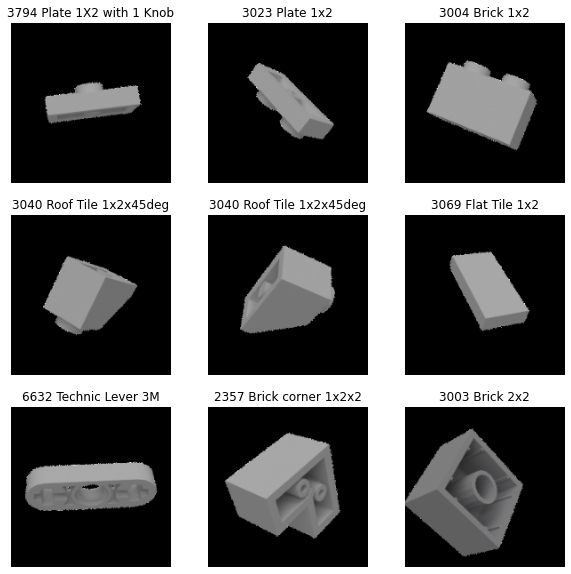

In [ ]:
#Once the data is loaded, we can now see some glimpses of dataset from below code.
#This is for training set

image_train_batch, label_train_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_train_batch[i].numpy().astype("uint8"))
  label = label_train_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

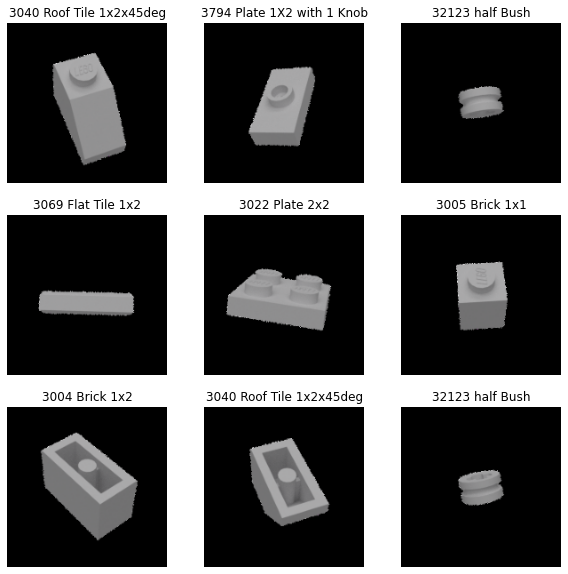

In [ ]:
#This is for Validation set
image_val_batch, label_val_batch = next(iter(val_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_val_batch[i].numpy().astype("uint8"))
  label = label_val_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

# Model Training

Next Step: Training of the model.

I have used CNN model for training my dataset.

There are Convolutional layers followed by MaxPooling layers.

At the hidden layers, "Relu" activation is used.

The final layers consists of 16 neurons which is the number of classes and since it is a classification problem with multiple classes, "Softmax" activation is used. 

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, 
                                              input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(16,activation = 'softmax')
])

#model.summary() gives a detailed summary of the defined model.
#It specifies all the layers along with the number of parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0

Next step is to compile and fit the model.

For the given problem, sparse_categorical_crossentropy is used for loss and accuracy is the metrics

I have specified 20 epochs for the first run.

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(train_ds, validation_data=val_ds, epochs =20)

Epoch 1/20
160/160 [==============================] - 58s 342ms/step - loss: 1.4083 - accuracy: 0.5352 - val_loss: 0.5579 - val_accuracy: 0.8016
Epoch 2/20
160/160 [==============================] - 15s 86ms/step - loss: 0.4290 - accuracy: 0.8394 - val_loss: 0.4103 - val_accuracy: 0.8541
Epoch 3/20
160/160 [==============================] - 13s 78ms/step - loss: 0.2609 - accuracy: 0.9095 - val_loss: 0.3965 - val_accuracy: 0.8706
Epoch 4/20
160/160 [==============================] - 13s 79ms/step - loss: 0.1887 - accuracy: 0.9231 - val_loss: 0.3412 - val_accuracy: 0.8729
Epoch 5/20
160/160 [==============================] - 13s 81ms/step - loss: 0.1617 - accuracy: 0.9381 - val_loss: 0.3281 - val_accuracy: 0.8925
Epoch 6/20
160/160 [==============================] - 13s 78ms/step - loss: 0.1157 - accuracy: 0.9531 - val_loss: 0.3506 - val_accuracy: 0.8871
Epoch 7/20
160/160 [==============================] - 13s 80ms/step - loss: 0.0939 - accuracy: 0.9597 - val_loss: 0.2959 - val_accuracy

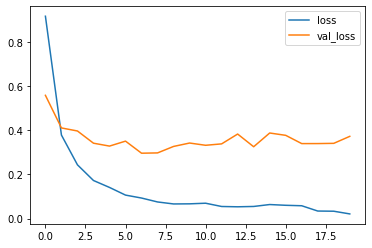

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

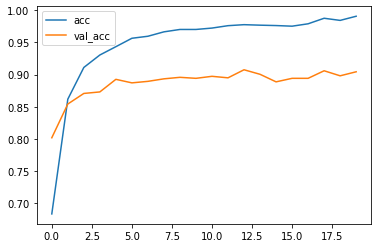

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

From above cells, it can be seen that although we got a good accuracy, but the "loss" and "val_loss" is not better. 

loss = 0.0244
val_loss = 0.3722

So, I have decided to use data augmentation to improve my above model.

In [ ]:
# Using Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# Specifying the model with augmented data
model = tf.keras.Sequential([
layers.experimental.preprocessing.Rescaling(1./255, 
                                          input_shape=(img_height, img_width, 3)),
     data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(16,activation = 'softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 32)       

I have tried earlier with 15 epochs on the new model, but it didn't performed well.
Hence, I tried 35 epochs for this run.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(train_ds, validation_data=val_ds, epochs =35)

Epoch 1/35
160/160 [==============================] - 15s 86ms/step - loss: 1.6476 - accuracy: 0.4514 - val_loss: 0.7121 - val_accuracy: 0.7349
Epoch 2/35
160/160 [==============================] - 14s 83ms/step - loss: 0.6445 - accuracy: 0.7605 - val_loss: 0.5261 - val_accuracy: 0.7945
Epoch 3/35
160/160 [==============================] - 13s 82ms/step - loss: 0.4869 - accuracy: 0.8119 - val_loss: 0.3882 - val_accuracy: 0.8494
Epoch 4/35
160/160 [==============================] - 14s 84ms/step - loss: 0.3649 - accuracy: 0.8625 - val_loss: 0.3438 - val_accuracy: 0.8698
Epoch 5/35
160/160 [==============================] - 14s 84ms/step - loss: 0.3190 - accuracy: 0.8825 - val_loss: 0.2942 - val_accuracy: 0.8988
Epoch 6/35
160/160 [==============================] - 15s 90ms/step - loss: 0.2684 - accuracy: 0.9056 - val_loss: 0.2467 - val_accuracy: 0.9106
Epoch 7/35
160/160 [==============================] - 14s 84ms/step - loss: 0.2478 - accuracy: 0.9110 - val_loss: 0.2624 - val_accuracy:

From the above executed cell, It can be clearly stated that my model has performed well this time.
with:
loss = 0.0492
accuracy = 0.9832
val_loss = 0.0913
val_accuracy = 0.9663

Let's check the plots to get a more clear picture of my statement.

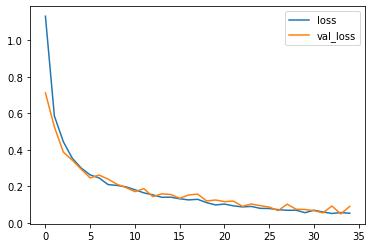

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

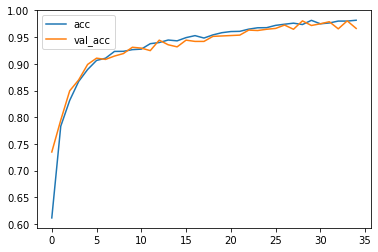

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

So, from the above plots I can surely say that my model has performed better on both the datasets i.e. train set and validation set.

Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


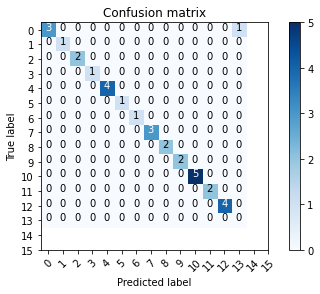

In [ ]:
#Plotting a confusion matrix.

image_batch, label_batch = next(iter(val_ds))

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(image_batch).argmax(axis=1)
cm = confusion_matrix(label_batch, p_test)
plot_confusion_matrix(cm, list(range(16)))



From the above confusion matrix, 
I can conclude that out of batch data of 32 images,
31 images have been classified correctly whereas only 1 has been misclassified.
Hence, I can say that the model has done a good job.

## Model Deployment

## Save the entire model.

model.save('cnn_model')

We can also save the weights by using save_weights()

## Load model back for use..
from tensorflow import keras

model = keras.models.load_model('cnn_model')

#Thank you.